<a href="https://colab.research.google.com/github/abinarain/BaySiCel/blob/main/BaySiCel_Bay1SingleCellProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author: Abhishek N. Singh**

Project on Bayes Theorem Application in Single-Cell Gene expression data Imputation

**Email: abhishek.narain@iitdalumni.com**

**Date: 24th December 2020**

**ScriptName: BaySiCel (pronounced: Bicycle ) - Bayes theorem based Single Cell data imputation**

**Description: The script is written in Python. It takes in data as CSV file with rows as different values of cells and columns as different values of expression of genes such as mRNA-seq. The cell names have header name as Cell. The user is 1st suppose to sort the column as per cell-type, such that, cells with similar types share similar names which is captured by keeping the 1st alphabet after period '.' as same letter. As an example, cells with Id VZA00602.A03 and VZA00602.A06 belong to the same batch and the cells are thus suppose to have similarity in identity such as derived from the same tissue. The script works by first conducting a Bayesian Posterior probability calculation wherever possible to impute the missing values. Thereafter, if there are still any missing values as shown by 0s are imputed using kNN algorithm. t-SNE 2-D plots are generated before and after the imputation that give a comparison of the impact of imputation.**


In [ ]:
pip install scedar


1st I would use k-nearest neighbors to impute the missing values. The SCEDAR library has all that it takes to imputation by k-nearest neighbors .

In [ ]:
import pandas 
import scedar as sce
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

  
# reading the CSV file 
csvFile = pandas.read_csv('gene.csv') 

In [ ]:
csvFile.head()

,Cell,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A3GALT2,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA2,ABCA3,ABCA5,ABCA7,ABCA9,ABCB1,ABCB10,ABCB4,ABCB6,ABCB7,ABCB8,...,ZSCAN12,ZSCAN12P1,ZSCAN16,ZSCAN16-AS1,ZSCAN18,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN25,ZSCAN26,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN32,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSCAN9,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM8-AS1,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,VZA00602.A03,0,0,1289,1281,0,0,0,0,0,0,152,0,0,684,0,987,0,0,0,1705,0,0,0,0,0,0,0,0,0,0,1258,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VZA00602.A05,0,0,1051,1450,0,0,0,0,0,0,0,0,0,681,0,1273,0,0,0,1208,0,0,0,0,0,0,0,0,0,0,871,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VZA00602.A07,0,0,1640,1805,0,0,0,0,0,0,0,0,0,1074,0,2402,0,0,0,2255,0,0,0,0,0,0,0,0,0,0,1784,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VZA00602.A11,0,0,1400,1090,0,0,0,0,0,0,0,0,0,661,0,964,0,0,0,1288,0,0,0,0,0,0,0,0,0,0,1086,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VZA00602.A15,0,0,1216,2479,0,0,0,0,0,0,549,0,0,764,0,0,0,0,0,980,0,0,0,0,0,0,0,0,0,0,1277,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
csvFile.tail()

,Cell,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A3GALT2,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA2,ABCA3,ABCA5,ABCA7,ABCA9,ABCB1,ABCB10,ABCB4,ABCB6,ABCB7,ABCB8,...,ZSCAN12,ZSCAN12P1,ZSCAN16,ZSCAN16-AS1,ZSCAN18,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN25,ZSCAN26,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN32,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSCAN9,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM8-AS1,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
333,VZA01005.O01,0,0,8372,12691,0,0,0,0,0,0,0,0,0,8122,0,7171,0,0,0,3224,0,0,0,0,0,0,0,0,0,0,4355,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,VZA01005.O02,0,0,13136,11004,0,0,1,0,0,0,0,0,0,7144,0,8897,0,0,0,2284,0,0,0,0,0,0,0,0,174,0,2170,0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,VZA01005.O03,1,0,13677,12424,0,0,0,0,0,0,0,0,0,3690,0,8091,0,0,0,2705,0,0,0,0,0,1,0,0,0,0,7200,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,VZA01005.O04,0,0,11312,7412,0,0,0,0,0,0,0,0,0,8774,0,4263,0,0,0,7938,0,0,0,0,0,0,0,0,2,0,3012,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,VZA01005.P04,0,0,6656,8799,0,0,0,0,0,0,0,0,0,5237,0,4241,275,0,0,3612,0,0,0,0,0,0,0,0,0,0,4773,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
NaN4Features = csvFile.isnull().sum()

In [ ]:
NaN4Features

Cell          0
A1BG          0
A1BG-AS1      0
A2M           0
A2M-AS1       0
           ... 
ZYG11A      338
ZYG11B      338
ZYX         338
ZZEF1       338
ZZZ3        338
Length: 17656, dtype: int64

In [ ]:
csvFile.shape

(338, 17656)

In [ ]:
#since the file has 338 rows, any gene column which has all the row values as NaN
#should be deleted

In [ ]:
df1 = csvFile.dropna(how='all', axis=1) #Dropping all columns that have full NaNs

In [ ]:
df1.head(20)

,Cell,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A3GALT2,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA2,ABCA3,ABCA5,ABCA7,ABCA9,ABCB1,ABCB10,ABCB4,ABCB6,ABCB7,ABCB8,...,GADD45A,GADD45B,GADD45G,GADD45GIP1,GAGE1,GAK,GAL,GAL3ST3,GAL3ST4,GALC,GALE,GALK1,GALK2,GALM,GALNS,GALNT1,GALNT10,GALNT11,GALNT12,GALNT14,GALNT2,GALNT3,GALNT4,GALNT6,GALNT7,GALNTL6,GALR2,GALT,GAMT,GAN,GANAB,GANC,GAPDH,GAPT,GAPVD1,GAR1,GAREM,GAREML,GARNL3,GARS
0,VZA00602.A03,0,0,1289,1281,0,0,0,0,0,0,152,0,0,684,0,987,0,0,0,1705,0,0,0,0,0,0,0,0,0,0,1258,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
1,VZA00602.A05,0,0,1051,1450,0,0,0,0,0,0,0,0,0,681,0,1273,0,0,0,1208,0,0,0,0,0,0,0,0,0,0,871,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,639,0,0,0
2,VZA00602.A07,0,0,1640,1805,0,0,0,0,0,0,0,0,0,1074,0,2402,0,0,0,2255,0,0,0,0,0,0,0,0,0,0,1784,0,0,0,0,0,0,0,0,...,0,0,0,0,140,0,0,0,0,0,506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302,44,0,0,0,0,0,167
3,VZA00602.A11,0,0,1400,1090,0,0,0,0,0,0,0,0,0,661,0,964,0,0,0,1288,0,0,0,0,0,0,0,0,0,0,1086,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199
4,VZA00602.A15,0,0,1216,2479,0,0,0,0,0,0,549,0,0,764,0,0,0,0,0,980,0,0,0,0,0,0,0,0,0,0,1277,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,257,812,0,0,11,0,0,0,452
5,VZA00602.A21,0,0,1047,1253,0,0,0,0,0,0,0,0,0,996,0,987,0,0,0,1659,0,0,0,0,405,0,0,0,0,0,1903,0,0,0,0,0,0,0,0,...,0,0,797,0,0,0,0,0,0,0,15,0,0,731,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,212,0,0,0,0,0,0,0
6,VZA00602.A23,0,0,747,1371,0,0,0,0,0,0,0,0,0,859,0,0,0,0,0,587,0,0,0,0,0,0,0,0,0,0,1416,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,367,0,0,0,0,0,0,0
7,VZA00602.B03,0,0,1317,762,0,0,0,0,0,0,474,0,0,476,0,0,0,0,0,907,0,0,0,0,0,0,0,0,0,0,1284,0,0,0,0,0,0,0,0,...,0,61,0,0,0,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13
8,VZA00602.B05,0,0,1545,2014,0,0,0,0,0,0,2,0,0,968,0,0,377,0,0,1596,0,0,0,0,0,0,0,0,0,0,1282,0,0,0,0,0,0,0,0,...,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,77,0,0,0,90,0,0,0,0,0,0,0,519
9,VZA00602.B07,0,0,1413,640,0,0,0,0,0,0,1,0,0,893,0,983,0,0,0,1834,0,0,0,0,0,0,0,0,0,0,1034,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,106,0,0,0,0,0,262,899


In [ ]:
df1.shape

(338, 5001)

In [ ]:
df2 = df1.dropna(how='all', axis=0) #Dropping all rows that have full NaNs

In [ ]:
df2.head()

,Cell,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A3GALT2,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA2,ABCA3,ABCA5,ABCA7,ABCA9,ABCB1,ABCB10,ABCB4,ABCB6,ABCB7,ABCB8,...,GADD45A,GADD45B,GADD45G,GADD45GIP1,GAGE1,GAK,GAL,GAL3ST3,GAL3ST4,GALC,GALE,GALK1,GALK2,GALM,GALNS,GALNT1,GALNT10,GALNT11,GALNT12,GALNT14,GALNT2,GALNT3,GALNT4,GALNT6,GALNT7,GALNTL6,GALR2,GALT,GAMT,GAN,GANAB,GANC,GAPDH,GAPT,GAPVD1,GAR1,GAREM,GAREML,GARNL3,GARS
0,VZA00602.A03,0,0,1289,1281,0,0,0,0,0,0,152,0,0,684,0,987,0,0,0,1705,0,0,0,0,0,0,0,0,0,0,1258,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
1,VZA00602.A05,0,0,1051,1450,0,0,0,0,0,0,0,0,0,681,0,1273,0,0,0,1208,0,0,0,0,0,0,0,0,0,0,871,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,639,0,0,0
2,VZA00602.A07,0,0,1640,1805,0,0,0,0,0,0,0,0,0,1074,0,2402,0,0,0,2255,0,0,0,0,0,0,0,0,0,0,1784,0,0,0,0,0,0,0,0,...,0,0,0,0,140,0,0,0,0,0,506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302,44,0,0,0,0,0,167
3,VZA00602.A11,0,0,1400,1090,0,0,0,0,0,0,0,0,0,661,0,964,0,0,0,1288,0,0,0,0,0,0,0,0,0,0,1086,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199
4,VZA00602.A15,0,0,1216,2479,0,0,0,0,0,0,549,0,0,764,0,0,0,0,0,980,0,0,0,0,0,0,0,0,0,0,1277,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,257,812,0,0,11,0,0,0,452


In [ ]:
df2.shape

(338, 5001)

there were no rows which had full NaNs

In [ ]:
del df2['Cell'] #This is done in order to keep only the gene expression data separately for calculation purpose

In [ ]:
df2.head(10)

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A3GALT2,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA2,ABCA3,ABCA5,ABCA7,ABCA9,ABCB1,ABCB10,ABCB4,ABCB6,ABCB7,ABCB8,ABCB9,...,GADD45A,GADD45B,GADD45G,GADD45GIP1,GAGE1,GAK,GAL,GAL3ST3,GAL3ST4,GALC,GALE,GALK1,GALK2,GALM,GALNS,GALNT1,GALNT10,GALNT11,GALNT12,GALNT14,GALNT2,GALNT3,GALNT4,GALNT6,GALNT7,GALNTL6,GALR2,GALT,GAMT,GAN,GANAB,GANC,GAPDH,GAPT,GAPVD1,GAR1,GAREM,GAREML,GARNL3,GARS
0,0,0,1289,1281,0,0,0,0,0,0,152,0,0,684,0,987,0,0,0,1705,0,0,0,0,0,0,0,0,0,0,1258,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
1,0,0,1051,1450,0,0,0,0,0,0,0,0,0,681,0,1273,0,0,0,1208,0,0,0,0,0,0,0,0,0,0,871,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,639,0,0,0
2,0,0,1640,1805,0,0,0,0,0,0,0,0,0,1074,0,2402,0,0,0,2255,0,0,0,0,0,0,0,0,0,0,1784,0,0,0,0,0,0,0,0,0,...,0,0,0,0,140,0,0,0,0,0,506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302,44,0,0,0,0,0,167
3,0,0,1400,1090,0,0,0,0,0,0,0,0,0,661,0,964,0,0,0,1288,0,0,0,0,0,0,0,0,0,0,1086,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199
4,0,0,1216,2479,0,0,0,0,0,0,549,0,0,764,0,0,0,0,0,980,0,0,0,0,0,0,0,0,0,0,1277,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,257,812,0,0,11,0,0,0,452
5,0,0,1047,1253,0,0,0,0,0,0,0,0,0,996,0,987,0,0,0,1659,0,0,0,0,405,0,0,0,0,0,1903,0,0,0,0,0,0,0,0,0,...,0,0,797,0,0,0,0,0,0,0,15,0,0,731,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,212,0,0,0,0,0,0,0
6,0,0,747,1371,0,0,0,0,0,0,0,0,0,859,0,0,0,0,0,587,0,0,0,0,0,0,0,0,0,0,1416,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,367,0,0,0,0,0,0,0
7,0,0,1317,762,0,0,0,0,0,0,474,0,0,476,0,0,0,0,0,907,0,0,0,0,0,0,0,0,0,0,1284,0,0,0,0,0,0,0,0,0,...,0,61,0,0,0,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13
8,0,0,1545,2014,0,0,0,0,0,0,2,0,0,968,0,0,377,0,0,1596,0,0,0,0,0,0,0,0,0,0,1282,0,0,0,0,0,0,0,0,0,...,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,77,0,0,0,90,0,0,0,0,0,0,0,519
9,0,0,1413,640,0,0,0,0,0,0,1,0,0,893,0,983,0,0,0,1834,0,0,0,0,0,0,0,0,0,0,1034,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,106,0,0,0,0,0,262,899


In [ ]:
#Total sum of NaN values in the dataset
df2.isnull().values.sum()

0

This double check method ensured that our data does not have any NaN values anymore

So we have successfully removed all NaN values

In [ ]:
df2.isin([0]).sum() #Here we see that each feature variable has lots of zeros

A1BG        277
A1BG-AS1    327
A2M           0
A2M-AS1       0
A2MP1       326
           ... 
GAR1        229
GAREM       295
GAREML      287
GARNL3      304
GARS        133
Length: 5000, dtype: int64

In [ ]:
df2.isin([0]).sum(axis=1) #Here we see the number of zeros per cell line rows

0      4702
1      4649
2      4083
3      4593
4      4618
       ... 
333    4461
334    3979
335    4262
336    3945
337    4232
Length: 338, dtype: int64

In [ ]:
df2.isin([0]).sum().sum()  #Here I get the total number of ZEROS in that needs to be imputed

1446458

**Before applying the Bayesian posterior probability, let me 1st simply apply kNN method for imputation and see how the t-SNE plot looks like. Then we will subsequently apply Bayesian posterior probability.**

In [ ]:
# plt.style.use('dark_background') 
plt.style.use('default')
%matplotlib inline

In [ ]:
%%time
sdm = sce.eda.SampleDistanceMatrix( df2.values.T,fids=df2.index.values.tolist(), metric='cosine', nprocs=1)

CPU times: user 6.09 ms, sys: 0 ns, total: 6.09 ms
Wall time: 6.23 ms


In [ ]:
%%time
kfi = sce.knn.FeatureImputation(sdm)
kfi_sdm = kfi.impute_features( k=[50], n_do=[15], min_present_val=[2], n_iter=[1], nprocs=1)[0]

/usr/local/lib/python3.6/dist-packages/scedar/eda/sdm.py:213: UserWarning: distance matrix might not be numerically correct. should be approximately symmetric. 
Not equal to tolerance rtol=0.001, atol=0

Mismatched elements: 27 / 12502500 (0.000216%)
Max absolute difference: 2.22044605e-16
Max relative difference: 1.
 x: array([0.      , 0.226778, 0.859883, ..., 0.      , 0.75385 , 0.      ])
 y: array([0.      , 0.226778, 0.859883, ..., 0.      , 0.75385 , 0.      ])
  "symmetric. {}".format(e))


CPU times: user 10.3 s, sys: 355 ms, total: 10.7 s
Wall time: 10.3 s


In [ ]:
kfi_sdm

After imputation by kNN, let me  do a t-SNE reduction

In [ ]:
%%time
kfi_tsne_x = kfi_sdm.tsne(perplexity=30, n_iter=3000, random_state=111)

/usr/local/lib/python3.6/dist-packages/scedar/eda/sdm.py:213: UserWarning: distance matrix might not be numerically correct. should be approximately symmetric. 
Not equal to tolerance rtol=0.001, atol=0

Mismatched elements: 27 / 12502500 (0.000216%)
Max absolute difference: 2.22044605e-16
Max relative difference: 1.
 x: array([0.      , 0.226778, 0.859883, ..., 0.      , 0.802417, 0.      ])
 y: array([0.      , 0.226778, 0.859883, ..., 0.      , 0.802417, 0.      ])
  "symmetric. {}".format(e))


CPU times: user 2min 30s, sys: 780 ms, total: 2min 31s
Wall time: 2min 31s


CPU times: user 36.9 ms, sys: 3.01 ms, total: 39.9 ms
Wall time: 38.8 ms


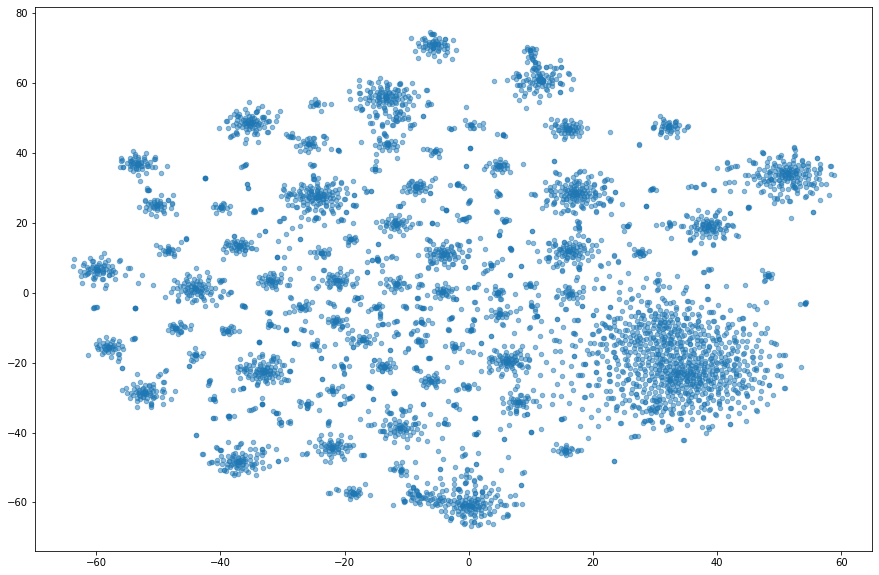

In [ ]:
%%time
# t-SNE plot after imputation
kfi_sdm.tsne_plot(  figsize=(15, 10), alpha=0.5, s=20,n_txt_per_cluster=0, plot_different_markers=True, shuffle_label_colors=False, random_state=15)

CPU times: user 55.6 s, sys: 112 ms, total: 55.7 s
Wall time: 55.8 s


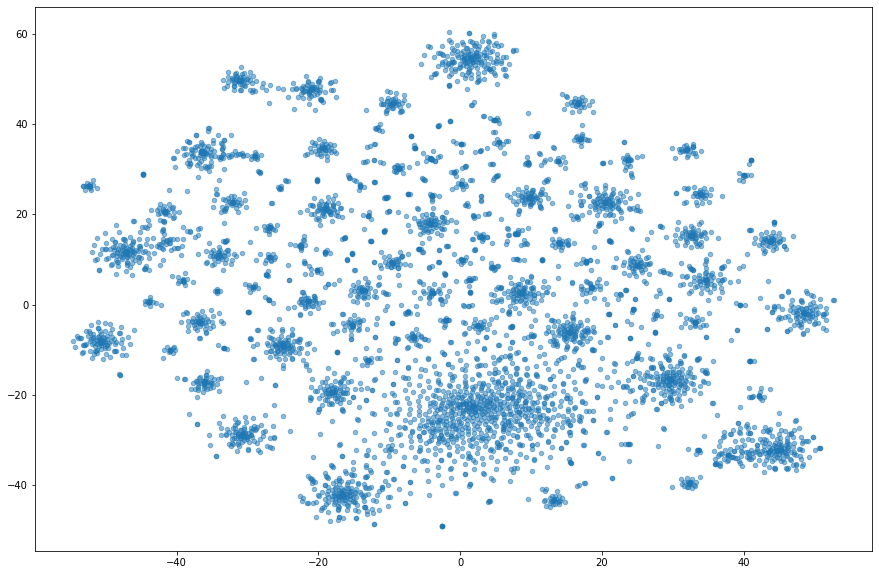

In [ ]:
%%time
# t-SNE plot before imputation
sdm.tsne_plot( figsize=(15, 10), alpha=0.5, s=20,
              n_txt_per_cluster=0, plot_different_markers=True,
              shuffle_label_colors=False, random_state=15)

In [ ]:
#We note that the diagrams are different. If we had labels, we could have used it
#to color the plots

**The count of each gene in each cell follows a Poisson–gamma mixture, also known as a negative 
binomial model can be used. However, given that we do not know much of relations between the genes, and we do know much of relations between the cells, it would make sense to use cells as evidence in the Bayes theorem. So the Posterior probability would be p(GENEi|CELLj) = p(CELLj|GENEi) p(GENEi) / p(CELLj). Here p(CELLj|GENEi) is likelihood, p(GENEi) is prior probability, and p(CELLj) is evidence.**

**This posterior probability needs to be multiplied by the MEAN of the expression level of GENEi. Final Score to be imputed = Posterior Probability (X) MEAN Expression Score of GENEi**

**Now the prior probability p(GENEi) is known for any gene = 1 / ( No. of columns) = 1 / 5000 = 0.0002**

In [ ]:
pGENEi = 1 /df2.shape[1]

In [ ]:
pGENEi

0.0002

**The EVIDENCE of p(CELLj) = (Total number of cells similar to CELLj) / (Total number of similar cells groups)**

In [ ]:
#Now lets grab the CELL names which is the 1st column in df1.

In [ ]:
CELLS = df1.Cell

In [ ]:
CELLS[0] #Lets check what we got

'VZA00602.A03'

In [ ]:
CELLS.shape[0] #So we can also see that the length is 338

338

In [ ]:
CELLS[1].split('.')#Checking if split works

['VZA00602', 'A05']

In [ ]:
CELLS[0].split('.')[1][0] #1 ensures I get the 2nd word after split. 0 ensures
#I get the 1st character after split. This is how I will get the groups of the cells

'A'

In [ ]:
CELLS[0].split('.')[1][0] == CELLS[1].split('.')[1][0] #This is how I check the group of the cell type if it is working

True

**Now we put a condition in loop such that the first word of cell is the same depicting same batch and the first letter of second word being same implying same or similar cell. We also leave the responsibility of sorting the data as per the batch and group order such as alphabetically to the user before processing the data by this script.**

In [ ]:
count = 0
#COUNT will keep track of counts that matched our criteria of cell group group name similarity
index = 1 #This keeps track of the index of the first new cell name which is different
counts = [] #This keeps track of list of counts for every cell
listOfSimilarCells = [] #This creates a list of similar cells
for j in range (0,CELLS.shape[0]): #We loop through the names of each of the cell IDs
  #We put a condition to check that the batch name is the same and the group name is the same represented by the 1st character after the period
  if ( ( CELLS[index-1].split('.')[1][0] == CELLS[j].split('.')[1][0]) & (CELLS[index-1].split('.')[0] == CELLS[j].split('.')[0])):
    count += 1
  else:
    #print('count',count)
    #print('index', index)
    #print('j', j)
    counts.append(count) #Updating the list of counts here
    str_a = CELLS[index-1].split('.')[0] #This is the batch name
    #print(str_a)
    str_b = CELLS[j-1].split('.')[1][0] #This is the group name represented by 1st character
    #print(str_b)
    str_a += str_b #Concatenating to get a cell group name as a common name comprising the batch and group together
    listOfSimilarCells.append(str_a)
    index = index + count #Here I update the index of the new cell name to be searched
    count = 0 #Initializing the counter back to zero for the next Gene name 
    #Since the value of j in the For loop has advanced by 1, we must check for that before iterating to next value of j
    if ( ( CELLS[index-1].split('.')[1][0] == CELLS[j].split('.')[1][0]) & (CELLS[index-1].split('.')[0] == CELLS[j].split('.')[0])):
      count += 1
#Once the loop is over, we need to perform the else part one more time for the last set of data
str_a = CELLS[index-1].split('.')[0] 
#print(str_a)
str_b = CELLS[j].split('.')[1][0]
#print(str_b)
str_a += str_b #Concatenating to get a cell group name for the last part
listOfSimilarCells.append(str_a)
counts.append(count) #Updating the list of counts here for the last part
print(count)

#print(listOfSimilarCells[0])


1


In [ ]:
counts #ProofChecking if we had the right number of entries for each group in the list

[7,
 9,
 9,
 7,
 9,
 9,
 9,
 9,
 10,
 10,
 7,
 9,
 12,
 7,
 7,
 7,
 11,
 9,
 10,
 10,
 9,
 7,
 10,
 10,
 11,
 10,
 10,
 9,
 8,
 9,
 9,
 10,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 2,
 3,
 4,
 4,
 1]

In [ ]:
listOfSimilarCells #Checking that we have the list of uniqe group names for each groups

['VZA00602A',
 'VZA00602B',
 'VZA00602C',
 'VZA00602D',
 'VZA00602E',
 'VZA00602F',
 'VZA00602G',
 'VZA00602H',
 'VZA00602I',
 'VZA00602J',
 'VZA00602K',
 'VZA00602L',
 'VZA00602M',
 'VZA00602N',
 'VZA00602O',
 'VZA00602P',
 'VZA01001A',
 'VZA01001B',
 'VZA01001C',
 'VZA01001D',
 'VZA01001E',
 'VZA01001F',
 'VZA01001G',
 'VZA01001H',
 'VZA01001I',
 'VZA01001J',
 'VZA01001K',
 'VZA01001L',
 'VZA01001M',
 'VZA01001N',
 'VZA01001O',
 'VZA01001P',
 'VZA01005A',
 'VZA01005B',
 'VZA01005C',
 'VZA01005D',
 'VZA01005E',
 'VZA01005F',
 'VZA01005G',
 'VZA01005H',
 'VZA01005I',
 'VZA01005J',
 'VZA01005K',
 'VZA01005L',
 'VZA01005M',
 'VZA01005N',
 'VZA01005O',
 'VZA01005P']

In [ ]:
#Double checking that the list counts and listOfSimilarCells have same number of entries

In [ ]:
len(counts)


48

In [ ]:
len(listOfSimilarCells)

48

So we see that the lenght of counts and listOfSimilarCells are the same which is a method to ensure that the program worked fine.

**Now the evidence pCELLi can be calculated simply by using the counts list and the listofSimilarCells list.**

In [ ]:
evidenceProbability = [] #Creating a list for evidence probability
totalCount = df2.shape[0] #This gives the total number of rows which is the total number of independent cells
for i in counts: #Loop through the entries in the list counts which has sum of counts for each group
  evidProb = i / totalCount # Here is what we calculate the evidence probability for every groups
  evidenceProbability.append(evidProb) #Creating a list of evidence probability for each group of cells of same batch and same type



In [ ]:
evidenceProbability #Lets see how the evidence probability list looks like

[0.020710059171597635,
 0.026627218934911243,
 0.026627218934911243,
 0.020710059171597635,
 0.026627218934911243,
 0.026627218934911243,
 0.026627218934911243,
 0.026627218934911243,
 0.029585798816568046,
 0.029585798816568046,
 0.020710059171597635,
 0.026627218934911243,
 0.03550295857988166,
 0.020710059171597635,
 0.020710059171597635,
 0.020710059171597635,
 0.03254437869822485,
 0.026627218934911243,
 0.029585798816568046,
 0.029585798816568046,
 0.026627218934911243,
 0.020710059171597635,
 0.029585798816568046,
 0.029585798816568046,
 0.03254437869822485,
 0.029585798816568046,
 0.029585798816568046,
 0.026627218934911243,
 0.023668639053254437,
 0.026627218934911243,
 0.026627218934911243,
 0.029585798816568046,
 0.008875739644970414,
 0.008875739644970414,
 0.008875739644970414,
 0.008875739644970414,
 0.008875739644970414,
 0.008875739644970414,
 0.011834319526627219,
 0.008875739644970414,
 0.011834319526627219,
 0.008875739644970414,
 0.008875739644970414,
 0.00591715976

In [ ]:
len(evidenceProbability) #Double check that the length of this new list is the same as desired i.e., matches lenght of counts list

48

So, now we have evidence probabilities for each of the cells names for every batch based on their similarity

In [ ]:
df2.shape[0]

338

In [ ]:
#Now I have to calculate Likelihood i.e. P(CELLj|GENEi)


**For likelihood, I would look for the counts entries where GENEi value is non-zero**

In [ ]:
listOfCellResults = [] #This will contain a list of genes whose expression is non-zero for a given cell-type name
rowStart = 0
rowEnd =1 #We keep this 1 because the last row is not included when using ILOC
#We pick up each batches of similar cell-types at a time and thus row start and row end combined with ILOC helps get this score
for j in range (0,len(counts)): #This is the length of total number of unique batches of cells. This 
  #number will also correspond to length of list of similar cells
  rowEnd = rowEnd + counts[j] #counts at index j will comprise the total number of cells in that cell-types batch
  listOfCellResults.append((df2.iloc[rowStart:rowEnd] > 0 ).sum())
  rowStart = rowEnd #updating the row start for the next batch 


      


In [ ]:
listOfCellResults #Checking that we got what we wanted

[A1BG        0
 A1BG-AS1    0
 A2M         8
 A2M-AS1     8
 A2MP1       0
            ..
 GAR1        1
 GAREM       1
 GAREML      0
 GARNL3      0
 GARS        4
 Length: 5000, dtype: int64, A1BG        0
 A1BG-AS1    0
 A2M         9
 A2M-AS1     9
 A2MP1       0
            ..
 GAR1        0
 GAREM       0
 GAREML      1
 GARNL3      1
 GARS        6
 Length: 5000, dtype: int64, A1BG        0
 A1BG-AS1    0
 A2M         9
 A2M-AS1     9
 A2MP1       0
            ..
 GAR1        0
 GAREM       0
 GAREML      2
 GARNL3      0
 GARS        7
 Length: 5000, dtype: int64, A1BG        0
 A1BG-AS1    0
 A2M         7
 A2M-AS1     7
 A2MP1       0
            ..
 GAR1        1
 GAREM       2
 GAREML      2
 GARNL3      0
 GARS        1
 Length: 5000, dtype: int64, A1BG        0
 A1BG-AS1    0
 A2M         9
 A2M-AS1     9
 A2MP1       0
            ..
 GAR1        0
 GAREM       1
 GAREML      2
 GARNL3      0
 GARS        5
 Length: 5000, dtype: int64, A1BG        0
 A1BG-AS1    0
 A2M 

In [ ]:
#Now I calculate the likelihood of a cell-type given certain gene has been expressed. This would also mean that now,
#I can also calculate posterior probability of expression of a gene given cell-type, since now we have prior, evidence and likelihood.
likelihood = []
posteriorProbability = []
for i in range(0,len(listOfSimilarCells)):
  likelihood.append(listOfCellResults[i] / len(listOfSimilarCells)) #Dividing by the total number of various cell-types as depicted by batches
  posteriorProbability.append((likelihood[i]*pGENEi) / evidenceProbability[i]) #Plugging in the values in Bayes theorem

In [ ]:
posteriorProbability[0] #Checking what we got
#print('Likelihood for Cells ',listOfSimilarCells[i],' given various Genes:')

A1BG        0.000000
A1BG-AS1    0.000000
A2M         0.001610
A2M-AS1     0.001610
A2MP1       0.000000
              ...   
GAR1        0.000201
GAREM       0.000201
GAREML      0.000000
GARNL3      0.000000
GARS        0.000805
Length: 5000, dtype: float64

**Now, here I start to do IMPUTATION.**

In [ ]:
listOfGenes = df2.columns #Here I create a list having the gene names in them
listOfGenes[0] #Checking what I got is what I wanted
lengthListOfGenes = len(listOfGenes)
lengthListOfGenes
meanValues = df2.mean(axis=1) #Creating mean value of expression for each of the genes
#Note that the computation below is computationally expensive given that there are 3 nested for loops. 
#In future a parallel implementation can help.

In [ ]:
rowStart = 0 
rowEnd = 0 
for j in range (0,len(counts)): #This is the length of total number of unique batches of cells. This 
  #number will also correspond to length of list of similar cells
  rowEnd = rowEnd + counts[j] #Here I will be able to thus deal with one batch of similar cell-type at a time
  for i in range(rowStart, rowEnd): #This chunk belongs to same cell-type -> so essentially a chunk of rows
    for k in range(0, lengthListOfGenes): #Here we cover the columns to cover every gene
      if (df2.iloc[i,k] == 0): #Thus this cell will need imputation. Note that many of the posterior probabilities collected are themselves ZEROS
        df2.iloc[i,k] = posteriorProbability[j][k] # As j varies from 0 to 48 corresponding to no. of unique cell-types, and k varies from 0 to 5000 corresponding to no. of genes
  rowStart = rowEnd + 1

In [ ]:
df2.head()                        

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A3GALT2,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA2,ABCA3,ABCA5,ABCA7,ABCA9,ABCB1,ABCB10,ABCB4,ABCB6,ABCB7,ABCB8,ABCB9,...,GADD45A,GADD45B,GADD45G,GADD45GIP1,GAGE1,GAK,GAL,GAL3ST3,GAL3ST4,GALC,GALE,GALK1,GALK2,GALM,GALNS,GALNT1,GALNT10,GALNT11,GALNT12,GALNT14,GALNT2,GALNT3,GALNT4,GALNT6,GALNT7,GALNTL6,GALR2,GALT,GAMT,GAN,GANAB,GANC,GAPDH,GAPT,GAPVD1,GAR1,GAREM,GAREML,GARNL3,GARS
0,0.0,0.0,1289,1281,0.0,0.0,0.0,0.0,0.0,0.0,152.000000,0.0,0.0,684.0,0.0,987.000000,0.0,0.0,0.0,1705,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,1258.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000201,0.000201,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.000402,16.000000,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,16.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,3.000000,0.000805,0.000201,0.0,0.000201,0.000201,0.0,0.0,0.000805
1,0.0,0.0,1051,1450,0.0,0.0,0.0,0.0,0.0,0.0,0.000604,0.0,0.0,681.0,0.0,1273.000000,0.0,0.0,0.0,1208,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,871.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000201,0.000201,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.000402,0.000604,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.000402,0.000805,0.000201,0.0,0.000201,639.000000,0.0,0.0,0.000805
2,0.0,0.0,1640,1805,0.0,0.0,0.0,0.0,0.0,0.0,0.000604,0.0,0.0,1074.0,0.0,2402.000000,0.0,0.0,0.0,2255,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,1784.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000201,0.000201,0.0,140.000000,0.0,0.0,0.0,0.0,0.0,506.000000,0.000604,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.000402,302.000000,44.000000,0.0,0.000201,0.000201,0.0,0.0,167.000000
3,0.0,0.0,1400,1090,0.0,0.0,0.0,0.0,0.0,0.0,0.000604,0.0,0.0,661.0,0.0,964.000000,0.0,0.0,0.0,1288,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,1086.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000201,0.000201,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.000402,8.000000,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.000402,0.000805,0.000201,0.0,0.000201,0.000201,0.0,0.0,199.000000
4,0.0,0.0,1216,2479,0.0,0.0,0.0,0.0,0.0,0.0,549.000000,0.0,0.0,764.0,0.0,0.001006,0.0,0.0,0.0,980,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,1277.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000201,0.000201,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.000402,0.000604,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000,0.0,0.0,257.000000,812.000000,0.000201,0.0,11.000000,0.000201,0.0,0.0,452.000000


In [ ]:
df2.isin([0]).sum().sum()  #Here I get the total number of ZEROS in that need to be imputed

910073

**So we see a reduction of ZERO cells from 1446458 to 910073. Difference 536,385 ZEROS have been imputed. However for correct imputation value to be placed, we need to multiply the imputed values by a good representative expression value number, such as the mean of expression level of a gene. As the expression levels of genes are greater than 1, while the probabilistic score for imputation is less than 1, we can simply multiply all the cells having score less than 1 by the mean of the gene expression value for that gene.**

**Percentage of cells imputed using BAYES theorem =
536385 / 1446458 *100% = 37%**

In [ ]:
df2.head() #This is how the data looks like before multiplying the probabilities with corresponding mean value of gene expression

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A3GALT2,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA2,ABCA3,ABCA5,ABCA7,ABCA9,ABCB1,ABCB10,ABCB4,ABCB6,ABCB7,ABCB8,ABCB9,...,GADD45A,GADD45B,GADD45G,GADD45GIP1,GAGE1,GAK,GAL,GAL3ST3,GAL3ST4,GALC,GALE,GALK1,GALK2,GALM,GALNS,GALNT1,GALNT10,GALNT11,GALNT12,GALNT14,GALNT2,GALNT3,GALNT4,GALNT6,GALNT7,GALNTL6,GALR2,GALT,GAMT,GAN,GANAB,GANC,GAPDH,GAPT,GAPVD1,GAR1,GAREM,GAREML,GARNL3,GARS
0,0.0,0.0,1289,1281,0.0,0.0,0.0,0.0,0.0,0.0,152.000000,0.0,0.0,684.0,0.0,987.000000,0.0,0.0,0.0,1705,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,1258.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000201,0.000201,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.000402,16.000000,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,16.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,3.000000,0.000805,0.000201,0.0,0.000201,0.000201,0.0,0.0,0.000805
1,0.0,0.0,1051,1450,0.0,0.0,0.0,0.0,0.0,0.0,0.000604,0.0,0.0,681.0,0.0,1273.000000,0.0,0.0,0.0,1208,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,871.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000201,0.000201,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.000402,0.000604,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.000402,0.000805,0.000201,0.0,0.000201,639.000000,0.0,0.0,0.000805
2,0.0,0.0,1640,1805,0.0,0.0,0.0,0.0,0.0,0.0,0.000604,0.0,0.0,1074.0,0.0,2402.000000,0.0,0.0,0.0,2255,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,1784.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000201,0.000201,0.0,140.000000,0.0,0.0,0.0,0.0,0.0,506.000000,0.000604,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.000402,302.000000,44.000000,0.0,0.000201,0.000201,0.0,0.0,167.000000
3,0.0,0.0,1400,1090,0.0,0.0,0.0,0.0,0.0,0.0,0.000604,0.0,0.0,661.0,0.0,964.000000,0.0,0.0,0.0,1288,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,1086.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000201,0.000201,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.000402,8.000000,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.000402,0.000805,0.000201,0.0,0.000201,0.000201,0.0,0.0,199.000000
4,0.0,0.0,1216,2479,0.0,0.0,0.0,0.0,0.0,0.0,549.000000,0.0,0.0,764.0,0.0,0.001006,0.0,0.0,0.0,980,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,1277.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000201,0.000201,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.000402,0.000604,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000,0.0,0.0,257.000000,812.000000,0.000201,0.0,11.000000,0.000201,0.0,0.0,452.000000


In [ ]:
#Now I impute the genes expressions by multiplying the corresponding gene expression mean factor
for i in range(0,lengthListOfGenes):
  meanValueGene = df2[listOfGenes[i]].mean()#Getting the mean value for that column Gene expression variable
  #Conditionally replacing the probability value by the product of probability value for that cell and mean of that gene expression in all cells
  df2[listOfGenes[i]] = df2[listOfGenes[i]].mask(df2[listOfGenes[i]]<1, df2[listOfGenes[i]] * meanValueGene) #Here all the column variable values which are less than 1 (As in probability) is multiplied by the mean


In [ ]:
df2.head() #Now we see that the values have been imputed correctly, as desired.

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A3GALT2,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA2,ABCA3,ABCA5,ABCA7,ABCA9,ABCB1,ABCB10,ABCB4,ABCB6,ABCB7,ABCB8,ABCB9,...,GADD45A,GADD45B,GADD45G,GADD45GIP1,GAGE1,GAK,GAL,GAL3ST3,GAL3ST4,GALC,GALE,GALK1,GALK2,GALM,GALNS,GALNT1,GALNT10,GALNT11,GALNT12,GALNT14,GALNT2,GALNT3,GALNT4,GALNT6,GALNT7,GALNTL6,GALR2,GALT,GAMT,GAN,GANAB,GANC,GAPDH,GAPT,GAPVD1,GAR1,GAREM,GAREML,GARNL3,GARS
0,0.0,0.0,1289,1281,0.0,0.0,0.0,0.0,0.0,0.0,152.000000,0.0,0.0,684.0,0.0,987.000000,0.0,0.0,0.0,1705,0.0,0.0,0.0,0.0,0.005532,0.0,0.0,0.0,0.0,0.0,1258.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.017897,0.006658,0.0,0.011211,0.0,0.0,0.0,0.0,0.0,0.017183,16.000000,0.0,0.033477,0.0,0.0,0.0,0.0,0.0,0.0,16.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00247,0.0,0.0,3.000000,0.035305,0.016865,0.0,0.011801,0.006012,0.0,0.0,0.1475
1,0.0,0.0,1051,1450,0.0,0.0,0.0,0.0,0.0,0.0,0.078757,0.0,0.0,681.0,0.0,1273.000000,0.0,0.0,0.0,1208,0.0,0.0,0.0,0.0,0.005532,0.0,0.0,0.0,0.0,0.0,871.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.017897,0.006658,0.0,0.011211,0.0,0.0,0.0,0.0,0.0,0.017183,0.043566,0.0,0.033477,0.0,0.0,0.0,0.0,0.0,0.0,0.001779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00247,0.0,0.0,0.027337,0.035305,0.016865,0.0,0.011801,639.000000,0.0,0.0,0.1475
2,0.0,0.0,1640,1805,0.0,0.0,0.0,0.0,0.0,0.0,0.078757,0.0,0.0,1074.0,0.0,2402.000000,0.0,0.0,0.0,2255,0.0,0.0,0.0,0.0,0.005532,0.0,0.0,0.0,0.0,0.0,1784.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.017897,0.006658,0.0,140.000000,0.0,0.0,0.0,0.0,0.0,506.000000,0.043566,0.0,0.033477,0.0,0.0,0.0,0.0,0.0,0.0,0.001779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00247,0.0,0.0,0.027337,302.000000,44.000000,0.0,0.011801,0.006012,0.0,0.0,167.0000
3,0.0,0.0,1400,1090,0.0,0.0,0.0,0.0,0.0,0.0,0.078757,0.0,0.0,661.0,0.0,964.000000,0.0,0.0,0.0,1288,0.0,0.0,0.0,0.0,0.005532,0.0,0.0,0.0,0.0,0.0,1086.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.017897,0.006658,0.0,0.011211,0.0,0.0,0.0,0.0,0.0,0.017183,8.000000,0.0,0.033477,0.0,0.0,0.0,0.0,0.0,0.0,0.001779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00247,0.0,0.0,0.027337,0.035305,0.016865,0.0,0.011801,0.006012,0.0,0.0,199.0000
4,0.0,0.0,1216,2479,0.0,0.0,0.0,0.0,0.0,0.0,549.000000,0.0,0.0,764.0,0.0,2.313161,0.0,0.0,0.0,980,0.0,0.0,0.0,0.0,0.005532,0.0,0.0,0.0,0.0,0.0,1277.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.017897,0.006658,0.0,0.011211,0.0,0.0,0.0,0.0,0.0,0.017183,0.043566,0.0,0.033477,0.0,0.0,0.0,0.0,0.0,0.0,0.001779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.00000,0.0,0.0,257.000000,812.000000,0.016865,0.0,11.000000,0.006012,0.0,0.0,452.0000


What can be further done is that the remaining 0s that we have can be imputed by kNN, as we did in the beginning of the script.

In [ ]:
%%time
sdm = sce.eda.SampleDistanceMatrix( df2.values.T,fids=df2.index.values.tolist(), metric='cosine', nprocs=1)

CPU times: user 8.43 ms, sys: 0 ns, total: 8.43 ms
Wall time: 8.52 ms


In [ ]:
%%time
kfi = sce.knn.FeatureImputation(sdm)
kfi_sdm = kfi.impute_features( k=[50], n_do=[15], min_present_val=[2], n_iter=[1], nprocs=1)[0]

/usr/local/lib/python3.6/dist-packages/scedar/eda/sdm.py:213: UserWarning: distance matrix might not be numerically correct. should be approximately symmetric. 
Not equal to tolerance rtol=0.001, atol=0

Mismatched elements: 27 / 12502500 (0.000216%)
Max absolute difference: 2.22044605e-16
Max relative difference: 1.
 x: array([0.      , 0.226778, 0.859871, ..., 0.      , 0.753819, 0.      ])
 y: array([0.      , 0.226778, 0.859871, ..., 0.      , 0.753819, 0.      ])
  "symmetric. {}".format(e))


CPU times: user 8.98 s, sys: 224 ms, total: 9.2 s
Wall time: 8.85 s


In [ ]:
%%time
kfi_tsne_x = kfi_sdm.tsne(perplexity=30, n_iter=3000, random_state=111)

/usr/local/lib/python3.6/dist-packages/scedar/eda/sdm.py:213: UserWarning: distance matrix might not be numerically correct. should be approximately symmetric. 
Not equal to tolerance rtol=0.001, atol=0

Mismatched elements: 27 / 12502500 (0.000216%)
Max absolute difference: 2.22044605e-16
Max relative difference: 1.
 x: array([0.      , 0.226778, 0.859871, ..., 0.      , 0.802402, 0.      ])
 y: array([0.      , 0.226778, 0.859871, ..., 0.      , 0.802402, 0.      ])
  "symmetric. {}".format(e))


CPU times: user 2min 26s, sys: 687 ms, total: 2min 27s
Wall time: 2min 27s


CPU times: user 23.6 ms, sys: 0 ns, total: 23.6 ms
Wall time: 26.8 ms


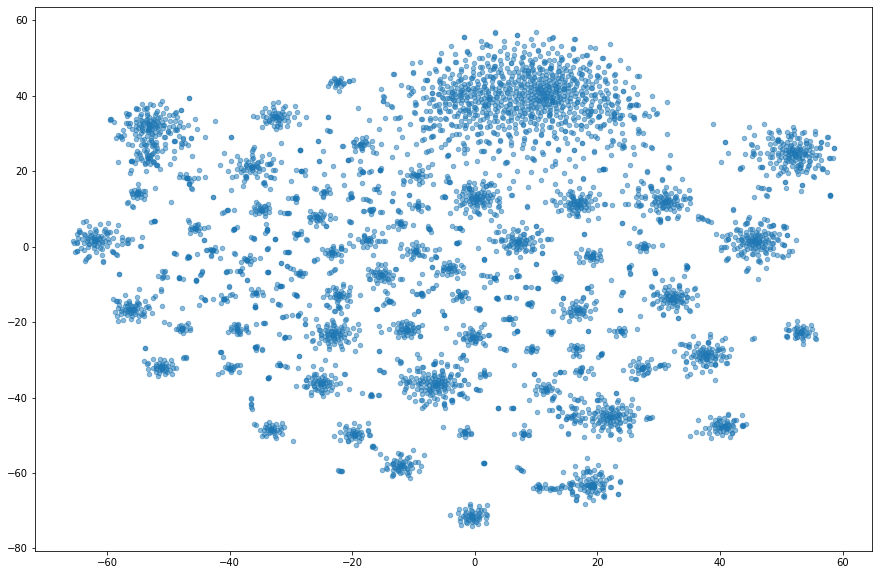

In [ ]:
%%time
# t-SNE plot after imputation
kfi_sdm.tsne_plot(  figsize=(15, 10), alpha=0.5, s=20,n_txt_per_cluster=0, plot_different_markers=True, shuffle_label_colors=False, random_state=15)

**We see that this t-SNE plot which comprises of IMPUTATION as a combination of Bayes posterior probability and kNN method is way different than the previous 2 plots obtained i.e. one without imputation and another with imputation using kNN only. Finished :)** 

In [ ]:
#Future scope of this work can involve usage of latent variable determination by Bernouli and Poisson distribution.

In [ ]:
#END